In [1]:
import sys
sys.path.append('../Software/wfi_reference_pipeline/')
%matplotlib inline

First, we load the two new bits of code

In [3]:
from wfi_reference_pipeline.utilities.reference_catalog import ReferenceCatalog

**WARNING**: LOCAL JWST PRD VERSION PRDOPSSOC-051 DOESN'T MATCH THE CURRENT ONLINE VERSION PRDOPSSOC-055
Please consider updating pysiaf, e.g. pip install --upgrade pysiaf or conda update pysiaf


In [4]:
from wfi_reference_pipeline.distortion.distortion import Distortion

The logic of the program is the following: We load a reference catalog (for now, from a file, and with certain format), and build the
`ReferenceCatalog` object. In this case we also specify a detector, so we don't carry the whole thing in memory. For future updates
we will use a more efficient way to load this type of catalogs.

In [5]:
refcat = ReferenceCatalog('../data/distortion_tests/stars_TM_siaf.rdh', 'WFI01')

In this case, we are going to build the reference file from a calibration image. We need to pass the image (as a numpy array).
For now, bit masks and PSF are ignored.

In [6]:
# Load one of A. Bellini's simulated images (from WFISimulator)
from astropy.io import fits
hdulist = fits.open('../data/distortion_tests/siaf_L2_SCA01.fits')
img = hdulist[0].data

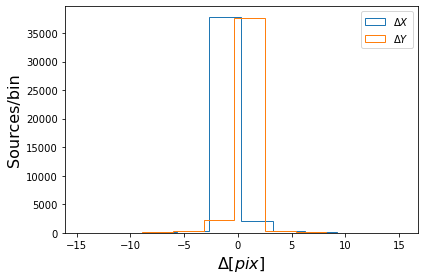

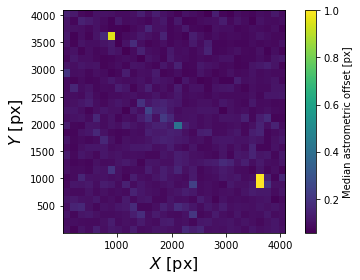

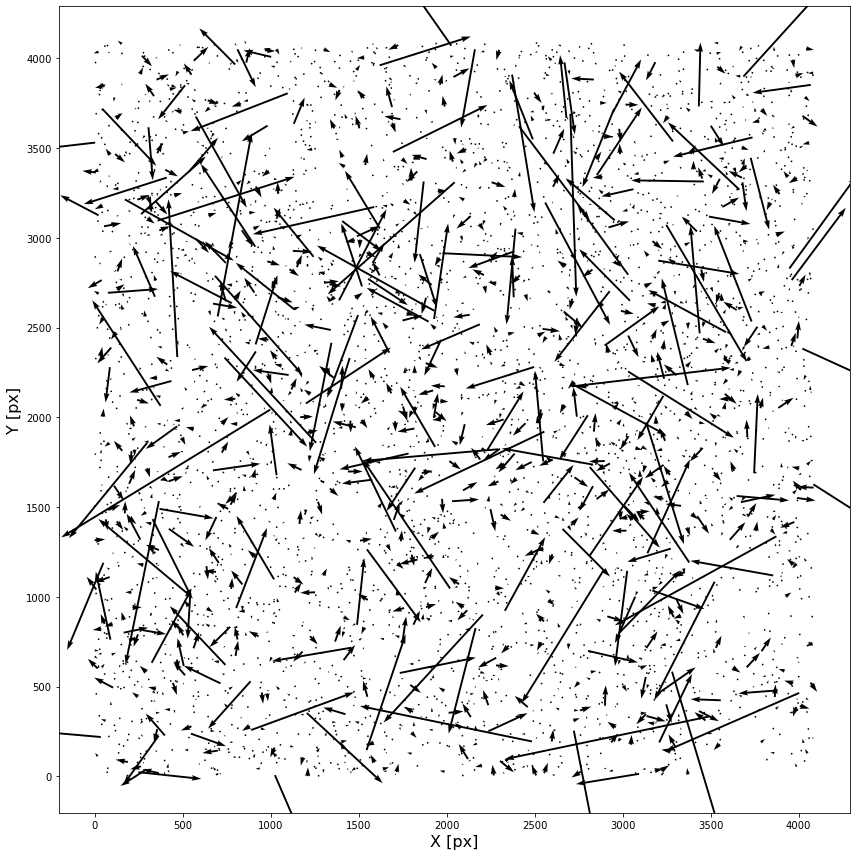

In [7]:
# Now we use the reference catalog and match it to the detected objects in the image. This populates the matched_cat attribute
refcat.match_refcat('WFI01', img, plot_diagnostics=True)

In [8]:
# Check some of the info
refcat.matched_cat['x_ref']

array([-92.49377517,  -4.08602927,  76.83641763, ..., 178.12592989,
       195.71869329, 222.65832995])

So, that concludes how to use the `ReferenceCatalog` class. This auxiliary class is used internally in `Distortion.make_distortion_from_stars` so we don't
really need to instantiate it. The code above is just to check that the results are sensible.

In [9]:
# Finally we build the distortion file
cdt_model = 0
metadata = dict()
metadata['useafter'] = '2022-01-01 00:00:00'
distortion = Distortion(cdt_model, metadata)

In [ ]:
# Make distortions from stars needs the image and the path to the catalog. It performs the matching within the method, and populates
# the `distortion.data` attribute, which contains the astropy.model object that characterizes the distortion
distortion.make_distortion_from_stars('WFI01', img, '/Users/jsanchez/data/distortion_tests/stars_TM_siaf.rdh') 

In [ ]:
distortion.data

Finally, compare with the SIAF-generated model.

In [ ]:
distortion2 = Distortion(cdt_model, metadata)

In [ ]:
distortion2.make_siaf_distortion('WFI01')

In [ ]:
distortion2.data

In [ ]:
# There are some differences, but they are in the high-order polynomial coefficients from SIAF. Potential improvements can include excluding more objects from the fits.